<a href="https://colab.research.google.com/github/mordor-ai/M2-traitement-avance-information/blob/main/AJOLY/TD/PersonalData2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIASHS 2019, Apprentissage Statistique: TD sur données personnelles 

Auteur: *Alexis Joly*

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data-2020.csv to data-2020.csv


# Import data

In [ ]:
import numpy as np
import pandas as pd
import io

#input_file="your file name"
input_file=io.BytesIO(uploaded['data-2020.csv'])
data_frame = pd.read_csv(input_file, delimiter = ",")

N=len(data_frame)
d=len(data_frame.columns)
print("nb of samples N=",N)
print("nb of variables d=",d)
print(data_frame.head())




nb of samples N= 35
nb of variables d= 12
   Age  taille  poids  pointure  ...  genre  animal  facebook  maison
0   41     179     75        43  ...      0       1         0       1
1   42     155     55        36  ...      1       1       121       0
2   33     176     66        43  ...      0       1         0       1
3   24     185     90        45  ...      0       1       152       0
4   39     170     58        41  ...      1       1        90       1

[5 rows x 12 columns]


# Split data in train and test data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

'''
X = data_frame.drop(columns=["animal","genre"])
y = data_frame[["animal","genre"]]
#X = data_frame.drop(['animal'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
'''

df_train, df_test = train_test_split(data_frame, test_size=0.25)


# Linear Regression

In [ ]:
from sklearn import linear_model

y= 'taille'
reg = linear_model.LinearRegression()
reg.fit(df_train.drop(y, axis=1), df_train[y])

#Score
print("Le score est de",reg.score(df_train.drop(y, axis=1), df_train[y]))
print("Le score est de",reg.score(df_test.drop(y, axis=1), df_test[y]))

print(df_train.drop(y, axis=1).columns.values)

print("Linear model weight: \n", reg.coef_)
print("Linear model weight: \n", reg.intercept_)

Le score est de 0.8520657656866687
Le score est de 0.13531667162788708
['Age' 'poids' 'pointure' 'frères' 'soeurs' 'cheveux' 'lunettes' 'genre'
 'animal' 'facebook' 'maison']
Linear model weight: 
 [ 2.50023057e-01  9.13610479e-02  1.58962593e+00  1.51615836e+00
  7.14963823e-01 -8.18969542e-02 -2.49021306e+00 -4.72826766e+00
  7.53695501e-01  1.39390248e-03 -2.05917838e+00]
Linear model weight: 
 97.46118652345271


# Recursive Features Elimination

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

y= 'facebook'
rfe = RFE(estimator=reg, n_features_to_select=1, step=1)
rfe.fit(df_train.drop(y, axis=1), df_train[y])
ranking = rfe.ranking_
#print used co-variables names
print(df_train.drop(y, axis=1).columns.values)
print(ranking)
#print determination coeff
print("coefficient de détermination Train=",rfe.score(df_train.drop(y, axis=1), df_train[y]))
print("coefficient de détermination Test=",rfe.score(df_test.drop(y, axis=1), df_test[y]))
#print trained weights (coefficients) and intercept
print("model weights:\n",rfe.estimator_.coef_)
print("model intercept:",rfe.estimator_.intercept_)


['Age' 'taille' 'poids' 'pointure' 'frères' 'soeurs' 'cheveux' 'lunettes'
 'genre' 'animal' 'maison']
[ 9  8 11  7  3  6 10  2  4  1  5]
coefficient de détermination Train= 0.08152231333798199
coefficient de détermination Test= -0.24775959615505938
model weights:
 [-163.17575758]
model intercept: 378.90909090909093


# Lasso & Ridge Path

taille
['Age' 'poids' 'pointure' 'frères' 'soeurs' 'cheveux' 'lunettes' 'genre'
 'animal' 'facebook' 'maison']
Computing regularization path using the lasso...


(-4.95, 103.95, -2.6849541809709265, 6.492526580546374)

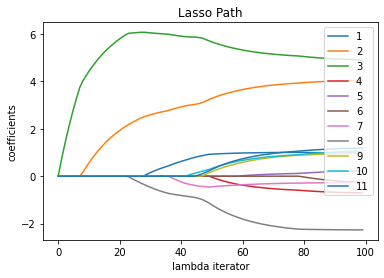

In [ ]:
from sklearn.linear_model import lasso_path
from sklearn.linear_model import enet_path
from sklearn.linear_model import lasso_path
from sklearn.linear_model import enet_path
import matplotlib.pyplot as plt
from sklearn import preprocessing
from itertools import cycle

########## calcul du chemin Lasso
y='taille'
print(y)

#############
scaler = preprocessing.StandardScaler().fit(df_train.drop(y, axis=1))
df_train_X_scaled = scaler.transform(df_train.drop(y, axis=1))
df_train_y = df_train[y]

# print used co-variables names
print(df_train.drop(y, axis=1).columns.values)

#Compute paths
eps =10e-3 # the smaller is the longer is the path
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(df_train_X_scaled, df_train_y)
#alphas_lasso, coefs_lasso, _ = enet_path(df_train_X_scaled, df_train_y; ll_ratio=0.01)

# Display results
plt.figure(1)
neg_log_alphas_lasso = -np.log10(alphas_lasso)

#print(alphas_lasso)
for i in range(0,len(df_train.columns)-1):
    plt.plot(coefs_lasso[i], label=i+1)

plt.xlabel('lambda iterator')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.legend(loc='upper right')
plt.axis('tight')






# AIC/BIC criteria for model selection with Lasso

In [ ]:
from sklearn import linear_model

from sklearn import linear_model


######### Calcul le chemin Lasso
y='facebook'
print("predict:",y)
#################################
scaler = preprocessing.StandardScaler().fit(df_train.drop(y, axis=1))
df_train_X_scaled=scaler.transform(df_train.drop(y, axis=1))
df_train_y=df_train[y]
df_test_X_scaled=scaler.transform(df_test.drop(y, axis=1))
df_test_y=df_test[y]
#print used co-variables names
print(df_train.drop(y, axis=1).columns.values)

print("AIC")
reg_aic = linear_model.LassoLarsIC(criterion='aic',eps = 10e-6)
reg_aic.fit(df_train_X_scaled, df_train_y)
print("linear model weights:",reg_aic.coef_)
print("coefficient de détermination Train=",reg_aic.score(df_train_X_scaled, df_train_y))
print("coefficient de détermination Test=",reg_aic.score(df_test_X_scaled, df_test_y))

print("\n")

print("BIC")
reg_bic = linear_model.LassoLarsIC(criterion='bic',eps = 10e-6)
reg_bic.fit(df_train_X_scaled, df_train_y)
print("linear model weights:",reg_bic.coef_)
print("coefficient de détermination Train=",reg_bic.score(df_train_X_scaled, df_train_y))
print("coefficient de détermination Test=",reg_bic.score(df_test_X_scaled, df_test_y))

def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_ + 1e-4
    alphas_ = model.alphas_ + 1e-4
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(reg_aic, 'AIC', 'b')






predict: facebook


NameError: ignored

# Regression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

y='genre'
print("predict:",y)

logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
logreg.fit(df_train.drop(y, axis=1), df_train[y]) 

#predictions
data_Y_predict=logreg.predict(df_test.drop(y, axis=1))
print("predictions :",data_Y_predict)
print("ground truth:",df_test[y].values)

#print determination coeff
print("Accuracy Train=",logreg.score(df_train.drop(y, axis=1), df_train[y]))
print("Accuracy Test=",logreg.score(df_test.drop(y, axis=1), df_test[y]))

#print used co-variables names
print(df_train.drop(y, axis=1).columns.values)

#print trained weights (coefficients) and intercept
print("linear model weights:\n",logreg.coef_)
print("linear model intercept:",logreg.intercept_)



predict: genre
predictions : [1 1 0 0 0 0 1 1 0]
ground truth: [0 1 1 1 0 1 1 1 0]
Accuracy Train= 1.0
Accuracy Test= 0.5555555555555556
['Age' 'taille' 'poids' 'pointure' 'frères' 'soeurs' 'cheveux' 'lunettes'
 'animal' 'facebook' 'maison']
linear model weights:
 [[-0.0600532   0.03943595 -0.26895286 -0.14236313  0.00486234 -0.01092503
   0.47519235 -0.00104917  0.03747855  0.00965358  0.00509427]]
linear model intercept: [0.00141646]


# Leave-p-out cross validation with Logistic Regression

In [ ]:
from sklearn.model_selection import LeavePOut

#validation croisée de p-out et on laisse p = 

# LeavePOut KNN


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeavePOut
from sklearn.neighbors import KNeighborsClassifier

y='animal'
print("predict:",y)

data_X=data_frame.drop(y, axis=1)
data_Y=data_frame[y]

cv = LeavePOut(1)
scores=cross_val_score(logreg,data_X,data_Y,scoring="accuracy",cv=cv)
avg_accuracy=np.average(scores)
std_accuracy=np.std(scores)
constant_predictor_sex=max(np.average(data_Y),np.average(1-data_Y))
print("cross-validation accuracy=",avg_accuracy,"±",std_accuracy,"prior=",constant_predictor_sex)


predict: animal
cross-validation accuracy= 0.45714285714285713 ± 0.49815987926179134 prior= 0.6


# Model Selection for animals prediction (by cross-validation and grid search)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

y='genre'
print("predict:",y)

data_X=data_frame.drop(y, axis=1)
data_Y=data_frame[y]

cv = LeavePOut(1)

#MLP 
#grid_MLP= GridSearchCV(estimator=MLPClassifier(max_iter=1000), param_grid={'hidden_layer_sizes':np.arange(10, 15)}, scoring="accuracy", cv=cv)
#grid_MLP.fit(data_X,data_Y)
#print("accuracy of best MLP model:",grid_MLP.best_score_)
#print("params of best MLP model:",grid_MLP.best_params_)

print("\n")
# KNN 
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(algorithm='brute'), param_grid={'n_neighbors':[1, 2, 3, 4, 5]}, scoring="accuracy", cv=cv)
grid_knn.fit(data_X,data_Y)
print("accuracy of best KNN model:",grid_knn.best_score_)
print("params of best KNN model:",grid_knn.best_params_)

print("\n")
# Ridge Classifier 
grid_ridge = GridSearchCV(estimator=RidgeClassifier(), param_grid={'alpha':[0.001, 0.01, 0.1, 1.0]}, scoring="accuracy", cv=cv)
grid_ridge.fit(data_X,data_Y)
print("accuracy of best RIDGE model:",grid_ridge.best_score_)
print("params of best RIDGE model:",grid_ridge.best_params_)

print("\n")
# Random Forest  
grid_RF = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators':[1, 10, 100], 'max_depth':[2, 3, 4, 5]}, scoring="accuracy", cv=cv)
grid_RF.fit(data_X,data_Y)
print("accuracy of best RF model:",grid_RF.best_score_)
print("params of best RF model:",grid_RF.best_params_)

print("\n")
# SVM (C-regularized)
#grid_svm = GridSearchCV(estimator=svm.SVC(gamma=0.001), param_grid={'kernel':('linear', 'rbf'), 'C':[1, 10, 100]}, scoring="accuracy", cv=cv)
grid_svm = GridSearchCV(estimator=svm.SVC(gamma=0.001,kernel='linear'), param_grid={'C':[1, 10, 100]}, scoring="accuracy", cv=cv)
grid_svm.fit(data_X,data_Y)
print("accuracy of best SVM model:",grid_svm.best_score_)
print("params of best SVM model:",grid_svm.best_params_)



predict: genre


accuracy of best KNN model: 0.5714285714285714
params of best KNN model: {'n_neighbors': 1}


accuracy of best RIDGE model: 0.8857142857142857
params of best RIDGE model: {'alpha': 0.001}


accuracy of best RF model: 0.8857142857142857
params of best RF model: {'max_depth': 2, 'n_estimators': 100}


accuracy of best SVM model: 0.8285714285714286
params of best SVM model: {'C': 1}


# Ablation analysis of Best model (interpretability)

In [ ]:
from sklearn.inspection import permutation_importance

best_estimator=grid_ridge.best_estimator_

scores=cross_val_score(best_estimator,data_X,data_Y,scoring="accuracy",cv=cv)
score_with_all_variables=np.average(scores)
print("With all variables "," accuracy=",np.average(scores))

#remove each input variable iteratively, train and predict
for variable in data_X.columns:
    # Train best estimator on the whole training set
    data_X_abblation=data_X.drop(variable, axis=1)
    #best_best_estimator.fit(data_X_abblation,data_Y)
    scores=cross_val_score(best_estimator,data_X_abblation,data_Y,scoring="accuracy",cv=cv)
    print("Without ",variable," accuracy loss=",score_with_all_variables-np.average(scores))
    
print("\n")

r = permutation_importance(best_estimator, data_X, data_Y,n_repeats=30,random_state=0)
#print used co-variables names
print(data_X.columns.values)
print(r.importances_mean)

With all variables   accuracy= 0.8857142857142857
Without  Age  accuracy loss= 0.02857142857142858
Without  taille  accuracy loss= 0.0
Without  poids  accuracy loss= 0.02857142857142858
Without  pointure  accuracy loss= 0.08571428571428563
Without  frères  accuracy loss= 0.02857142857142858
Without  soeurs  accuracy loss= 0.08571428571428563
Without  cheveux  accuracy loss= 0.02857142857142858
Without  lunettes  accuracy loss= 0.02857142857142858
Without  animal  accuracy loss= 0.02857142857142858
Without  facebook  accuracy loss= 0.0
Without  maison  accuracy loss= 0.0


['Age' 'taille' 'poids' 'pointure' 'frères' 'soeurs' 'cheveux' 'lunettes'
 'animal' 'facebook' 'maison']
[0.0352381  0.08       0.03047619 0.11619048 0.00857143 0.07428571
 0.23238095 0.00857143 0.01142857 0.00095238 0.02285714]
